# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [44]:
subjects = path.get_subjects()
print(subjects)

subject = 'micheal'
update_subject = True
trials = path.get_trials(subject)
print(trials)

['giovanni', 'luca', 'micheal', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

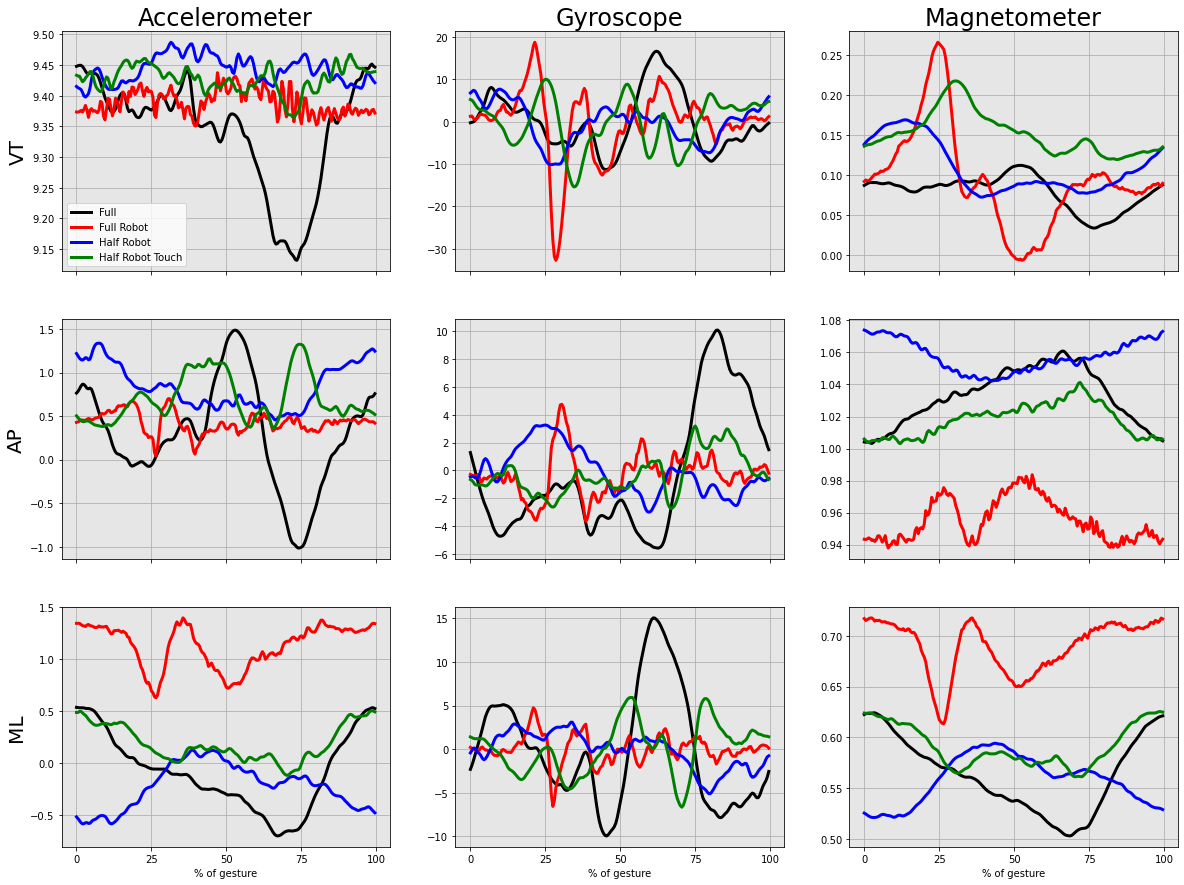

In [45]:
segment = 'trunk'
imu.plot_all_trials(subject, 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

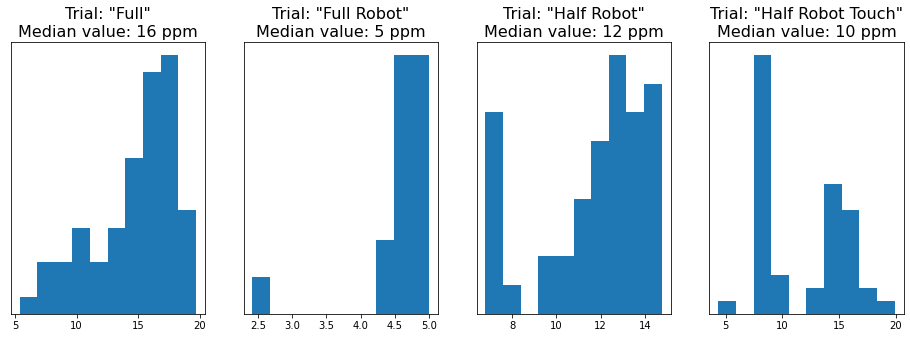

In [46]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [47]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 56 trials after outliers removal
	Average frequency: 16 PPM
	Average duration: 3.83 s
	Variability of duration: 0.97 s

Trial Full Robot, 15 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 12.79 s
	Variability of duration: 0.75 s

Trial Half Robot, 40 trials after outliers removal
	Average frequency: 12 PPM
	Average duration: 4.82 s
	Variability of duration: 1.08 s

Trial Half Robot Touch, 41 trials after outliers removal
	Average frequency: 10 PPM
	Average duration: 5.91 s
	Variability of duration: 3.10 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [48]:
param = parameters.cycle_parameters(subject, update=update_subject)

Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [49]:
pp = parameters.global_parameters(subject, update=update_subject)

Loading saved cycle parameters...
Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Plots

## Accelerometer

### Trunk

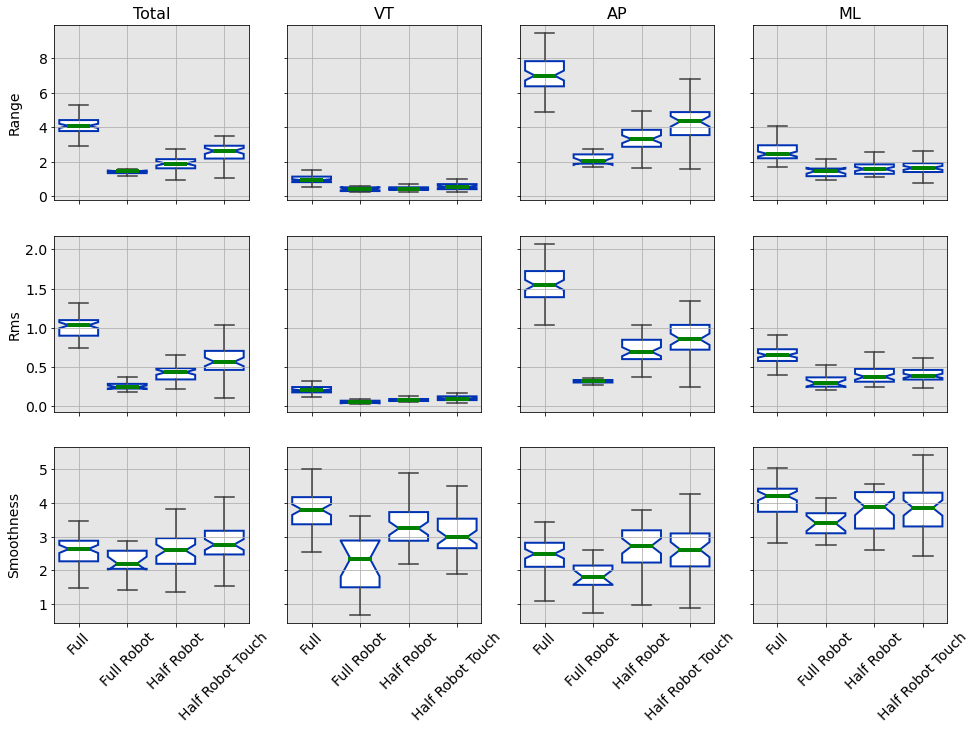

In [50]:
imu.plot_parameters(param, 'trunk', 'acc')

### Arm

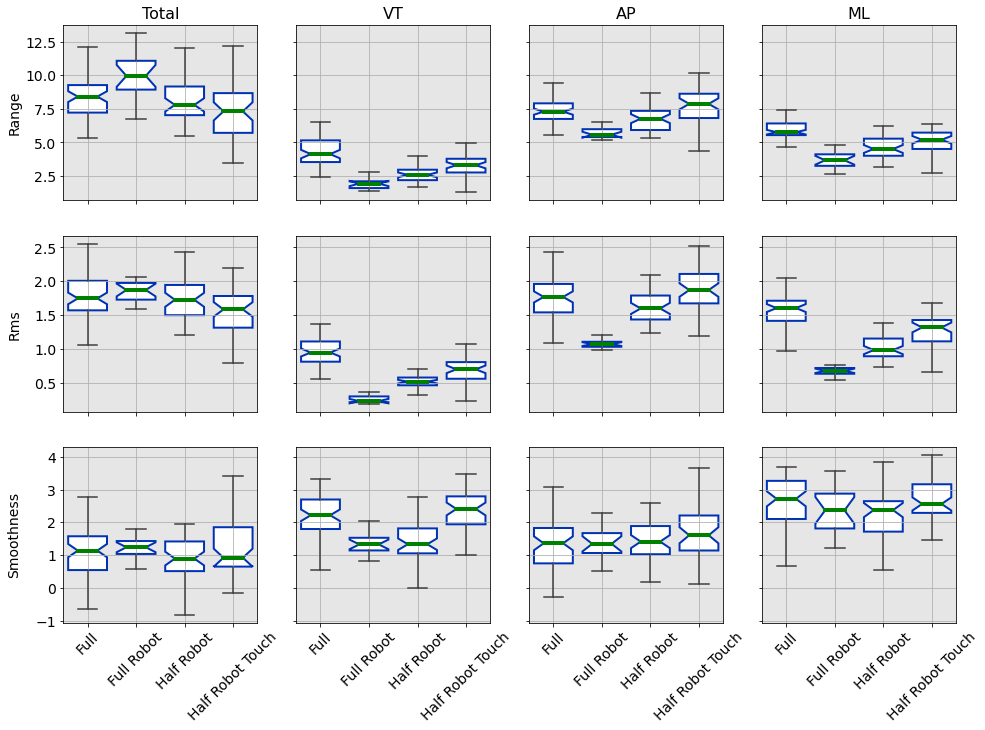

In [51]:
imu.plot_parameters(param, 'arm', 'acc')

### Forearm

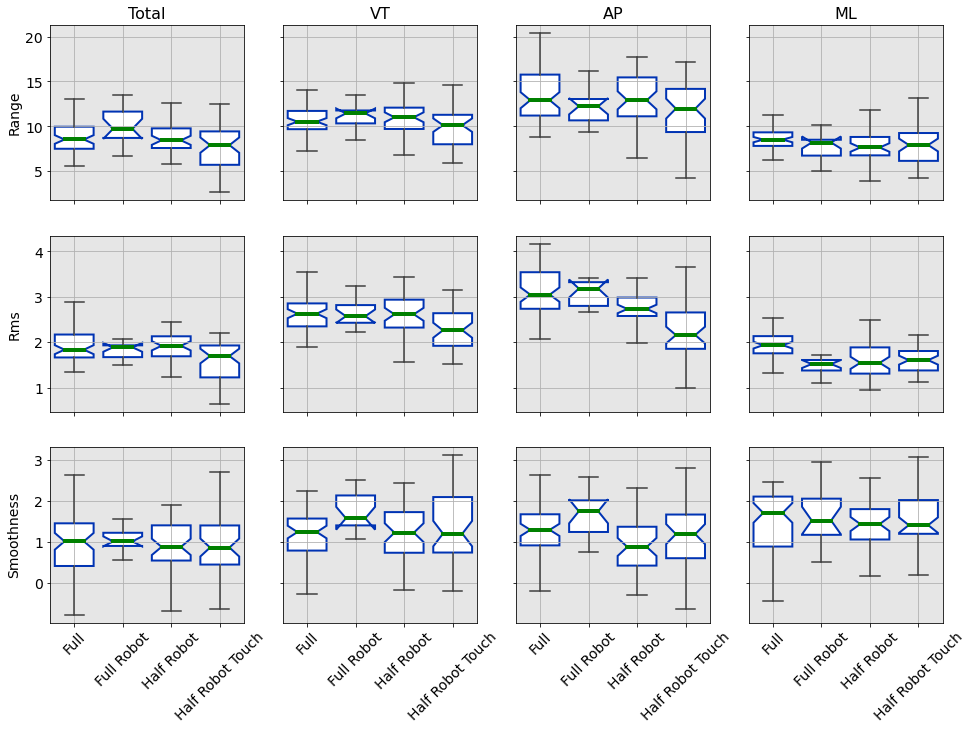

In [52]:
imu.plot_parameters(param, 'forearm', 'acc')

## Gyroscope

### Trunk

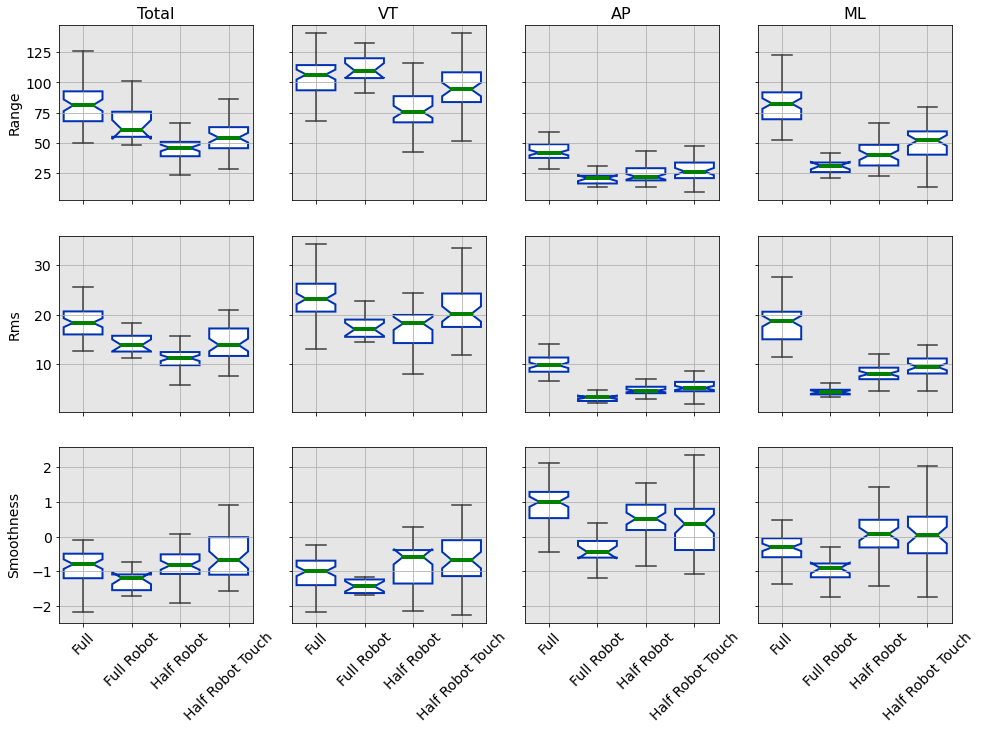

In [53]:
imu.plot_parameters(param, 'trunk', 'gyr')

### Arm

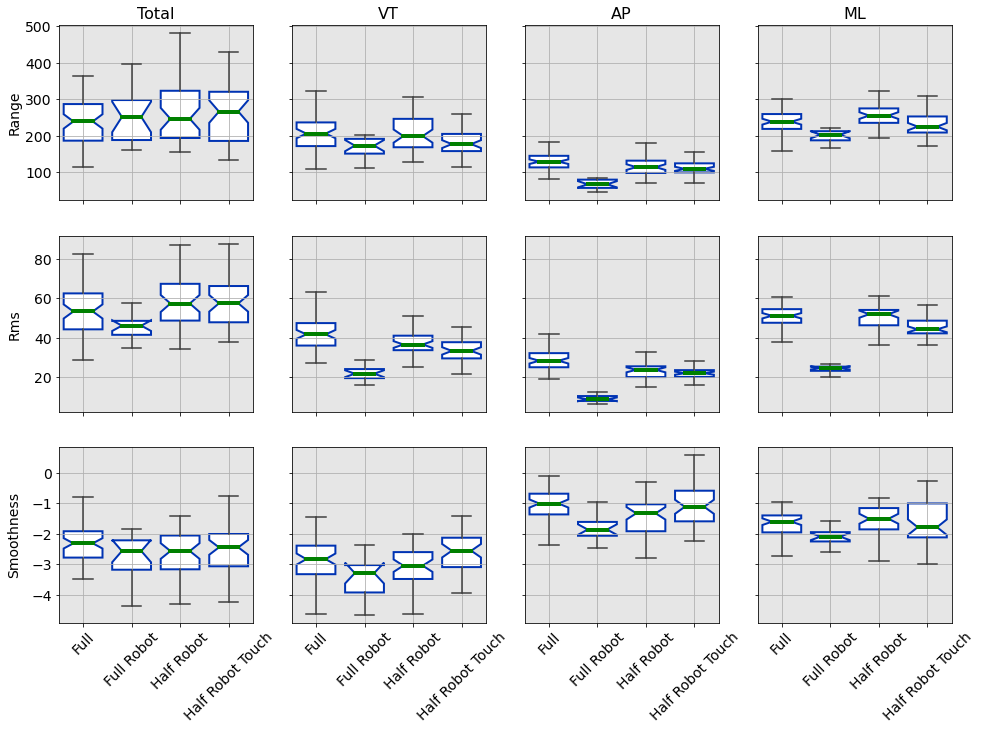

In [54]:
imu.plot_parameters(param, 'arm', 'gyr')

### Forearm

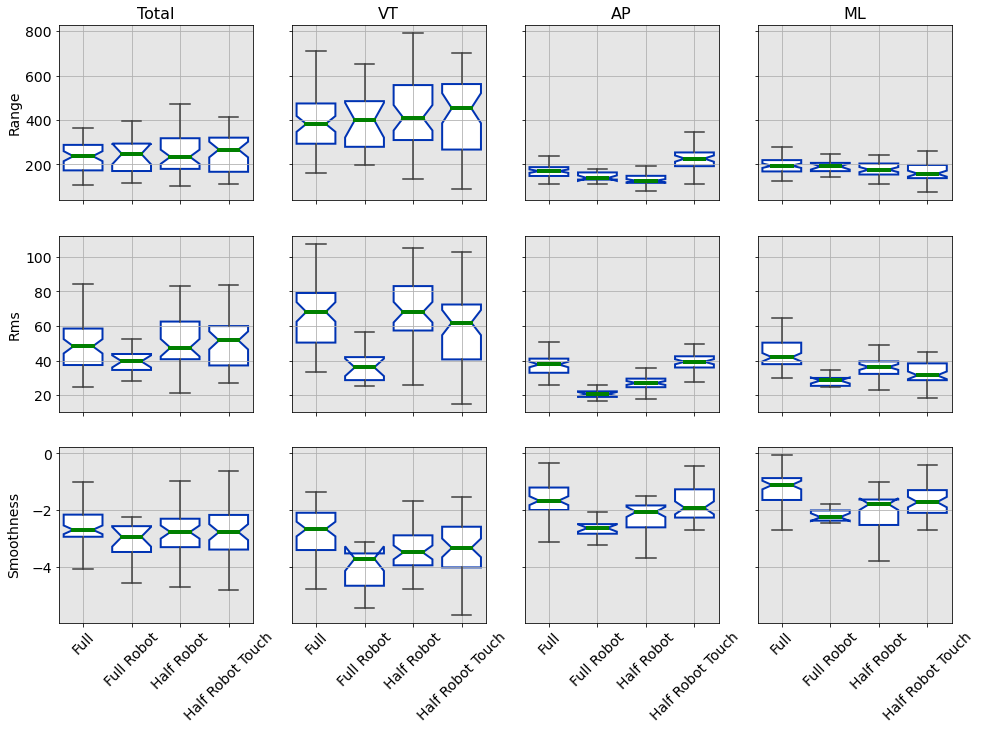

In [55]:
imu.plot_parameters(param, 'forearm', 'gyr')

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [56]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

smoothness_acc  range_acc   rms_acc  \
segment dimension trial                                                   
arm     global    full                    1.110872   8.327039  1.781791   
                  full_robot              1.171471   9.914822  1.789256   
                  half_robot              0.865538   8.426848  1.755616   
                  half_robot_touch        1.154703   7.551020  1.565175   
        x         full                    2.145163   4.265481  0.971554   
                  full_robot              1.282698   1.988716  0.254075   
                  half_robot              1.406012   2.687706  0.509423   
                  half_robot_touch        2.350488   3.123755  0.665345   
        y         full                    1.336856   7.357702  1.763775   
                  full_robot              1.409151   5.839154  1.059002   
                  half_robot              1.327565   6.833204  1.627742   
                  half_robot_touch        1.687049   7.653460  1.889809   
        z         full                    2.594051   5.901652  1.566205   
                  full_robot              2.396099   3.638226  0.665597   
                  half_robot              2.233205   4.616822  1.015403   
                  half_robot_touch        2.674193   4.951217  1.250050   
forearm global    full                    0.981140   8.779818  1.924070   
                  full_robot              1.029318  10.078502  1.768218   
                  half_robot              0.817006   8.858907  1.913745   
                  half_robot_touch        0.990080   7.843567  1.598280   
        x         full                    1.099713  10.729642  2.621044   
                  full_robot              1.723806  11.170971  2.642994   
                  half_robot              1.099133  11.289534  2.584656   
                  half_robot_touch        1.432658   9.754475  2.263828   
        y         full                    1.263938  13.574987  3.117874   
                  full_robot              1.632459  12.112998  3.091192   
                  half_robot              0.899340  13.197511  2.717471   
                  half_robot_touch        1.181539  11.529979  2.199075   
        z         full                    1.522601   8.677579  1.946350   
                  full_robot              1.594885   7.832575  1.474890   
                  half_robot              1.487261   7.836306  1.619838   
                  half_robot_touch        1.563882   7.965302  1.617720   
trunk   global    full                    2.470720   4.112576  1.007380   
                  full_robot              2.231493   1.475818  0.257246   
                  half_robot              2.554688   1.908707  0.426706   
                  half_robot_touch        2.790933   2.421234  0.546107   
        x         full                    3.724251   0.965967  0.211791   
                  full_robot              2.237990   0.404407  0.056110   
                  half_robot              3.300324   0.468348  0.083740   
                  half_robot_touch        3.046253   0.572164  0.101248   
        y         full                    2.380725   7.050705  1.552532   
                  full_robot              1.769336   2.186725  0.326657   
                  half_robot              2.648727   3.338434  0.712925   
                  half_robot_touch        2.598286   4.068104  0.837258   
        z         full                    4.082071   2.574833  0.667567   
                  full_robot              3.364217   1.481200  0.312510   
                  half_robot              3.789009   1.656500  0.402696   
                  half_robot_touch        3.848442   1.703955  0.409942   

                                    smoothness_gyr   range_gyr    rms_gyr  \
segment dimension trial                                                     
arm     global    full                   -2.318447  241.526891  53.767089   
                  full_robot             -2.798870  24